Rows: 203
Unique customers: 50
Top products:
 product_name
Juice        12
Shampoo      11
Apple        11
Coffee       10
Rice         10
Chicken       8
Beef          8
Deodorant     8
Orange        8
Bread         8
Name: count, dtype: int64
Top products:
 product_name
Juice        12
Shampoo      11
Apple        11
Coffee       10
Rice         10
Chicken       8
Beef          8
Deodorant     8
Orange        8
Bread         8
Name: count, dtype: int64
Purchases over time:
 date
2024-01-01    1
2024-01-03    1
2024-01-05    2
2024-01-08    1
2024-01-10    1
             ..
2024-12-19    4
2024-12-22    1
2024-12-23    1
2024-12-25    1
2024-12-28    1
Length: 147, dtype: int64
Purchases over time:
 date
2024-01-01    1
2024-01-03    1
2024-01-05    2
2024-01-08    1
2024-01-10    1
             ..
2024-12-19    4
2024-12-22    1
2024-12-23    1
2024-12-25    1
2024-12-28    1
Length: 147, dtype: int64


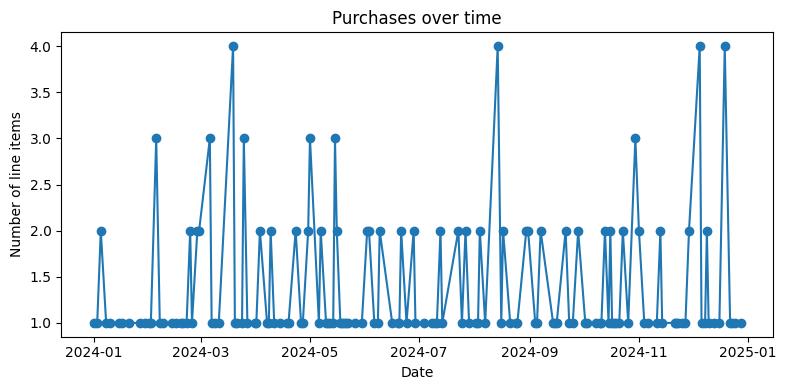

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read data
df = pd.read_csv('../data/raw/sample.csv', parse_dates=['date'], dayfirst=False)
print('Rows:', len(df))
print('Unique customers:', df['customer_id'].nunique(dropna=True))

# Top 10 products by count
top = df['product_name'].value_counts().head(10)
print('Top products:\n', top)

# Purchases over time (count per day)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
time_series = df.dropna(subset=['date']).groupby(df['date'].dt.date).size()
print('Purchases over time:\n', time_series)

# Plot
fig, ax = plt.subplots(figsize=(8,4))
time_series.plot(ax=ax, marker='o')
ax.set_title('Purchases over time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of line items')
plt.tight_layout()
plt.show()